In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('cleaned_traffic_data.csv')
#rush hours: Morning: 7 AM to 9 AM, Evening: 4 PM to 6 PM
#df['is_rush_hour'] = df['Hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 18) else 0)
df.head()

,Severity,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Type_of_Road,Hour,is_rush_hour
0,2,OH,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,0,Traffic_Signal,8.0,1
1,2,OH,35.1,28.6,89.0,29.65,6.0,WSW,8.1,0.02,0,Traffic_Signal,11.0,0
2,2,OH,36.0,29.0,86.0,29.63,7.0,West,9.2,0.00,0,Traffic_Signal,12.0,0
3,2,OH,39.9,32.9,70.0,29.61,10.0,WNW,11.5,0.00,0,Traffic_Signal,14.0,0
4,2,OH,37.0,31.6,89.0,29.61,10.0,West,6.9,0.00,0,Traffic_Signal,16.0,1


## Linear Regression

                            OLS Regression Results                            
Dep. Variable:               Severity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1393.
Date:                Fri, 09 May 2025   Prob (F-statistic):          8.74e-305
Time:                        17:31:45   Log-Likelihood:            -7.1835e+05
No. Observations:             1274811   AIC:                         1.437e+06
Df Residuals:                 1274809   BIC:                         1.437e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1087      0.000   4270.777   

<Axes: xlabel='is_rush_hour'>

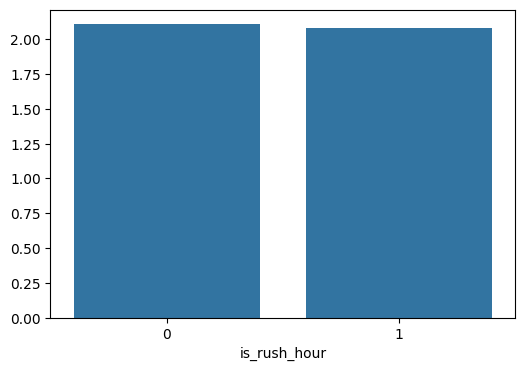

In [ ]:
#effect of hour on severity
X = df[['is_rush_hour']]
X = sm.add_constant(X)
y = df['Severity']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

avg_severity_rush_hour = df.groupby('is_rush_hour')['Severity'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_severity_rush_hour.index, y=avg_severity_rush_hour.values)

In [23]:
X = pd.get_dummies(df[['State', 'is_rush_hour']], drop_first=True)
X = X.astype(float)
X = sm.add_constant(X)
y = df['Severity']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Severity   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1112.
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        17:34:28   Log-Likelihood:            -6.9235e+05
No. Observations:             1274811   AIC:                         1.385e+06
Df Residuals:                 1274761   BIC:                         1.385e+06
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0797      0.003    675.260   

In [12]:
#determing what states predict higher severity
X = pd.get_dummies(df['State'], drop_first=True)
X = X.astype(float)
X = sm.add_constant(X)
Y = df['Severity']
model = sm.OLS(Y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1103.
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        17:23:04   Log-Likelihood:            -6.9310e+05
No. Observations:             1274811   AIC:                         1.386e+06
Df Residuals:                 1274762   BIC:                         1.387e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0669      0.003    674.641      0.000       2.061       2.073
AR             0.0726      0.009      8.205      0.000       0.055       0.090
AZ            -0.1408      0.004    -38.890      0.000      -0.148      -0.134
CA             0.0086      0.003      2.689      0.007       0.002       0.015
CO             0.1407      0.005     30.503      0.000       0.132       0.150
CT             0.2574      0.006     45.184      0.000       0.246       0.269
DC             0.0447      0.006      7.444      0.000       0.033       0.056
DE             0.1086      0.008     13.211      0.000       0.092       0.125
FL            -0.0237      0.003     -7.417      0.000      -0.030      -0.017
GA             0.2261      0.005     49.990      0.000       0.217       0.235
IA             0.2125      0.009     22.971      0.000       0.194       0.231
ID            -0.0226      0.009     -2.651      0.008      -0.039      -0.006
IL             0.2377      0.004     63.736      0.000       0.230       0.245
IN             0.2420      0.006     38.830      0.000       0.230       0.254
KS             0.2176      0.010     21.354      0.000       0.198       0.238
KY             0.0744      0.007     11.409      0.000       0.062       0.087
LA            -0.0304      0.004     -7.319      0.000      -0.038      -0.022
MA             0.0384      0.005      8.221      0.000       0.029       0.048
MD             0.1713      0.004     39.549      0.000       0.163       0.180
ME             0.1924      0.036      5.343      0.000       0.122       0.263
MI             0.0889      0.004     21.610      0.000       0.081       0.097
MN             0.0180      0.004      4.446      0.000       0.010       0.026
MO             0.2422      0.005     48.588      0.000       0.232       0.252
MS             0.0831      0.010      7.964      0.000       0.063       0.104
MT            -0.0239      0.012     -1.996      0.046      -0.047      -0.000
NC            -0.0413      0.003    -12.075      0.000      -0.048      -0.035
ND            -0.0427      0.027     -1.603      0.109      -0.095       0.010
NE             0.0070      0.008      0.909      0.363      -0.008       0.022
NH             0.0837      0.014      6.116      0.000       0.057       0.111
NJ             0.1390      0.004     31.174      0.000       0.130       0.148
NM             0.0220      0.010      2.172      0.030       0.002       0.042
NV             0.0081      0.008      0.990      0.322      -0.008       0.024
NY             0.1080      0.003     31.220      0.000       0.101       0.115
OH             0.0358      0.004      8.027      0.000       0.027       0.045
OK            -0.0504      0.004    -12.568      0.000      -0.058      -0.043
OR            -0.0015      0.004     -0.347      0.729      -0.010       0.007
PA

In [24]:
pvalues = results.pvalues.drop('const')

# Get states with p < 0.05 (statistically significant)
significant_states = pvalues[pvalues < 0.05].index
not_significant_states = pvalues[pvalues > 0.05].index
# Show their coefficients
significant_coefs = results.params[significant_states]
print(significant_coefs.sort_values())
print(len(significant_coefs)) # This means 44 states have significant p values with severity
print(not_significant_states)

State_AZ       -0.140984
State_SC       -0.053796
State_OK       -0.049320
State_NC       -0.039961
State_TN       -0.036037
State_LA       -0.030988
is_rush_hour   -0.029055
State_MT       -0.027467
State_FL       -0.024815
State_ID       -0.024294
State_MN        0.016004
State_NM        0.026623
State_VA        0.033061
State_OH        0.038977
State_MA        0.044412
State_DC        0.044421
State_UT        0.051563
State_TX        0.052732
State_WV        0.068998
State_AR        0.069235
State_KY        0.079758
State_MS        0.083399
State_NH        0.087098
State_MI        0.088481
State_WA        0.104947
State_NY        0.106320
State_DE        0.108122
State_PA        0.111410
State_NJ        0.137231
State_CO        0.143800
State_SD        0.165518
State_MD        0.169201
State_ME        0.193322
State_IA        0.212520
State_KS        0.217768
State_GA        0.225696
State_IL        0.239222
State_MO        0.241286
State_IN        0.244177
State_CT        0.254573


In [26]:
X = df.drop(columns = ['Severity'])
Y = df['Severity']

categorical_cols = ['State', 'Wind_Direction', 'Type_of_Road', 'Amenity']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X = X.astype(float)
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     329.9
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        19:06:38   Log-Likelihood:            -6.7321e+05
No. Observations:             1274811   AIC:                         1.347e+06
Df Residuals:                 1274522   BIC:                         1.350e+06
Df Model:                         288                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                           1.8276      0.411      4.447      0.000       1.022       2.633
Temperature(F)                                                                 -0.0012      0.000     -5.726      0.000      -0.002      -0.001
Wind_Chill(F)                                                                   0.0010      0.000      5.209      0.000       0.001       0.001
Humidity(%)                                                                  4.699e-05   2.16e-05      2.180      0.029    4.75e-06    8.92e-05
Pressure(in)                                                                    0.0049      0.001      6.819      0.000       0.004       0.006
Visibility(mi)                                                                 -0.0007      0.000     -4.416      0.000      -0.001      -0.000
Wind_Speed(mph)                                                                 0.0014   9.51e-05     14.776      0.000       0.001       0.002
Precipitation(in)                                                               0.0272      0.005      5.897      0.000       0.018       0.036
Hour                                                                            0.0030    7.1e-05     41.790      0.000       0.003       0.003
is_rush_hour                                                                   -0.0239      0.001    -32.067      0.000      -0.025      -0.022
State_AR                                                                        0.0193      0.009      2.210      0.027       0.002       0.036
State_AZ                                                                       -0.0915      0.004    -23.452      0.000      -0.099      -0.084
State_CA                                                                       -0.0246      0.003     -7.677      0.000      -0.031      -0.018
State_CO                                                                        0.1785      0.006     29.729      0.000       0.167       0.190
State_CT                                                                        0.1776      0.006     31.350      0.000       0.167       0.189
State_DC                                                                        0.0500      0.006      8.393      0.000       0.038       0.062
State_DE                                                                        0.1266      0.008     15.597      0.000       0.111       0.142
State_FL                                                                        0.0007      0.003      0.223      0.824      -0.006       0.007
State_GA                                                   

## Check Linear Regression Assumptions

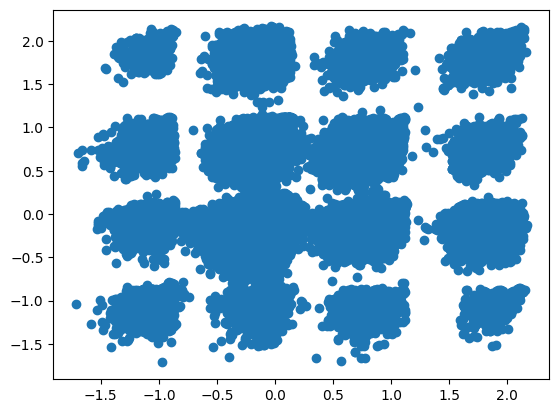

In [8]:
#check for mutual independence
resid = model.resid
plt.scatter(resid[:-1], resid[1:])
plt.show()

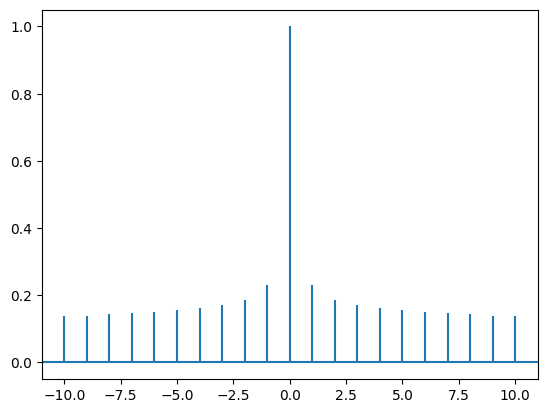

In [9]:
plt.acorr(resid)
plt.show()

## Cross Validation

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# model selection using p values on training set
variables = X.columns
model = sm.OLS(y_train,X_train[variables]).fit()
stat_sig_vars = variables
while any(model.pvalues > .05):
   stat_sig_vars = stat_sig_vars[model.pvalues <= .05]
   model = sm.OLS(y_train,X_train[stat_sig_vars]).fit()
 
# report statistics on test set
AICmodel = sm.OLS(y_test,X_test[stat_sig_vars]).fit()
AICmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     181.3
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        19:08:04   Log-Likelihood:            -1.3733e+05
No. Observations:              254963   AIC:                         2.748e+05
Df Residuals:                  254895   BIC:                         2.755e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                              2.0350      0.047     43.599      0.000       1.944       2.126
Temperature(F)                                                    -0.0016      0.000     -3.319      0.001      -0.003      -0.001
Wind_Chill(F)                                                      0.0012      0.000      2.677      0.007       0.000       0.002
Pressure(in)                                                       0.0006      0.002      0.376      0.707      -0.002       0.004
Visibility(mi)                                                    -0.0010      0.000     -2.758      0.006      -0.002      -0.000
Wind_Speed(mph)                                                    0.0015      0.000      7.936      0.000       0.001       0.002
Precipitation(in)                                                  0.0631      0.012      5.114      0.000       0.039       0.087
Hour                                                               0.0032      0.000     20.362      0.000       0.003       0.003
is_rush_hour                                                      -0.0289      0.002    -17.184      0.000      -0.032      -0.026
State_AZ                                                          -0.1085      0.006    -19.473      0.000      -0.119      -0.098
State_CA                                                           0.0297      0.003     10.198      0.000       0.024       0.035
State_CO                                                           0.1703      0.012     14.559      0.000       0.147       0.193
State_CT                                                           0.2757      0.011     24.948      0.000       0.254       0.297
State_DC                                                           0.0801      0.011      6.986      0.000       0.058       0.103
State_DE                                                           0.1238      0.017      7.229      0.000       0.090       0.157
State_GA                                                           0.2536      0.008     33.334      0.000       0.239       0.268
State_IA                                                           0.2127      0.020     10.841      0.000       0.174       0.251
State_IL                                                           0.2556      0.005     47.662      0.000       0.245       0.266
State_IN                                                           0.2331      0.012     18.858      0.000       0.209       0.257
State_KS                                                           0.2707      0.022     12.538      0.000       0.228       0.313
State_KY                                                           0.1